# Working on depth

In [1]:
import os
import sys
import random
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


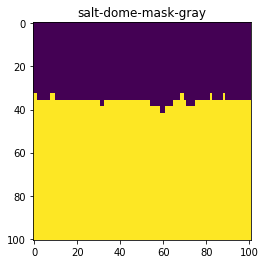

In [2]:
imgsd = cv2.imread('data/train/masks/0aabdb423e.png')

gray = cv2.cvtColor(imgsd, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.title('salt-dome-mask-gray')
# plt.imshow(imgsd)
# plt.title('salt-dome-mask-bw')
plt.show()

In [3]:
print(gray.shape)
# We converted it to grayscale so that, we have to deal with one channel
print(gray)

(101, 101)
[[  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 ..., 
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]]


In [4]:
path_train = 'data/train/'
train_ids = next(os.walk(path_train+"masks"))[2]
# Reading the names of each file in the path

print(train_ids[:10])

['000e218f21.png', '003c477d7c.png', '00441f1cf2.png', '0050766ae2.png', '005b452274.png', '0061281eea.png', '008a50a2ec.png', '00950d1627.png', '00a3af90ab.png', '00cda0328c.png']


In [5]:
mask_array = []

for n, id_ in tqdm_notebook(enumerate(train_ids), total=len(train_ids)):
    path = path_train
    mask = load_img(path + '/masks/' + id_)
    x = img_to_array(mask)[:,:,1]
    mask_array.append(x)

We will be taking the mask shown below for all references of work on a single image from now onwards.

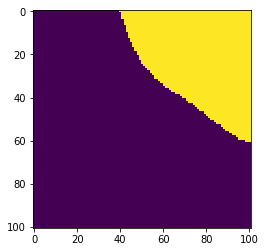

In [20]:
plt.imshow(m_array[21])

In [6]:
print(mask_array[21][0])

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.  255.  255.  255.  255.  255.  255.  255.  255.
  255.  255.  255.  255.  255.  255.  255.  255.  255.  255.  255.  255.
  255.  255.  255.  255.  255.  255.  255.  255.  255.  255.  255.  255.
  255.  255.  255.  255.  255.  255.  255.  255.  255.  255.  255.  255.
  255.  255.  255.  255.  255.  255.  255.  255.  255.  255.  255.  255.
  255.  255.  255.  255.  255.]


In [7]:
# Inspection of mask_array and m_array
print(mask_array[21])
m_array = np.asarray(mask_array)
print(m_array.shape)

[[   0.    0.    0. ...,  255.  255.  255.]
 [   0.    0.    0. ...,  255.  255.  255.]
 [   0.    0.    0. ...,  255.  255.  255.]
 ..., 
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]]
(4000, 101, 101)


In [23]:
## Checking for a single image

## Counting the number salt pixels in each row the mask

salt_img = np.zeros(m_array.shape[0])

for i in range(1):  
    img = m_array[21]
    
    salt_row = np.zeros(101)
    for j in range(m_array.shape[1]):
        row = img[j]
        
        for k in range(101):
            pixel = row[k]
            salt_row[j] +=pixel
    salt_row = salt_row/255
    print(salt_row)

[ 61.  60.  60.  60.  59.  59.  59.  58.  58.  58.  57.  57.  57.  56.  56.
  55.  55.  54.  54.  53.  53.  52.  52.  51.  51.  50.  49.  48.  47.  46.
  45.  45.  43.  42.  41.  40.  38.  37.  35.  33.  32.  30.  29.  27.  26.
  25.  24.  22.  21.  20.  19.  17.  16.  14.  13.  12.  10.   9.   7.   6.
   3.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]


In [42]:
## Checking for a single image

## Counting the number salt pixels in each mask

salt_img = np.zeros(m_array.shape[0])

for i in range(1):  
    img = m_array[21]
    
    salt_row = np.zeros(101)
    for j in range(m_array.shape[1]):
        row = img[j]
        
        for k in range(101):
            pixel = row[k]
            salt_row[j] +=pixel
        
        salt_img[i] += salt_row[j]

salt_img = salt_img/255
    
print('salt image :',salt_img)
print('shape of salt_img :',salt_img.shape)

salt image : [ 2426.     0.     0. ...,     0.     0.     0.]
shape of salt_img : (4000,)


In [43]:
## Checking for all images

## Counting the number salt pixels in each mask

salt_img = np.zeros(m_array.shape[0])

for i in range(m_array.shape[0]):  
    img = m_array[i]
    
    salt_row = np.zeros(101)
    for j in range(m_array.shape[1]):
        row = img[j]
        
        for k in range(101):
            pixel = row[k]
            salt_row[j] +=pixel
        
        salt_img[i] += salt_row[j]

salt_img = salt_img/255
    
print('salt image :',salt_img)
print('shape of salt_img :',salt_img.shape)

salt image : [    0.   336.     0. ...,     0.   886.  7187.]
shape of salt_img : (4000,)


In [54]:
df = pd.DataFrame(train_ids, columns=['id'])
df['salt per img'] = pd.DataFrame(salt_img)
df.head()

,ids,salt per img
0,000e218f21.png,0.0
1,003c477d7c.png,336.0
2,00441f1cf2.png,0.0
3,0050766ae2.png,0.0
4,005b452274.png,0.0


In [56]:
file = pd.read_csv('data/depths.csv')
df_depth = pd.DataFrame(file)
df_depth.head()

,id,z
0,4ac19fb269,306
1,1825fadf99,157
2,f59821d067,305
3,5b435fad9d,503
4,e340e7bfca,783


OOops! we can not merge them the id column of both the data frames are different.
> pd.merge(df,df_depths,on=['id'])

In [63]:
train_ids[:10]

['000e218f21.png',
 '003c477d7c.png',
 '00441f1cf2.png',
 '0050766ae2.png',
 '005b452274.png',
 '0061281eea.png',
 '008a50a2ec.png',
 '00950d1627.png',
 '00a3af90ab.png',
 '00cda0328c.png']

In [73]:
for i in range(len(train_ids)):
    train_ids[i] = train_ids[i][:10]

print(train_ids[:10])

['000e218f21', '003c477d7c', '00441f1cf2', '0050766ae2', '005b452274', '0061281eea', '008a50a2ec', '00950d1627', '00a3af90ab', '00cda0328c']


In [76]:
df1 = pd.DataFrame(train_ids, columns=['id'])
df1['salt per img'] = pd.DataFrame(salt_img)
df1.head()

,id,salt per img
0,000e218f21,0.0
1,003c477d7c,336.0
2,00441f1cf2,0.0
3,0050766ae2,0.0
4,005b452274,0.0


In [82]:
file = pd.read_csv('data/depths.csv')
df_depths = pd.DataFrame(file)
df_depths.head()

fdf = pd.merge(df1,df_depths,on=['id'])
fdf.head()

,id,salt per img,z
0,000e218f21,0.0,841
1,003c477d7c,336.0,673
2,00441f1cf2,0.0,330
3,0050766ae2,0.0,835
4,005b452274,0.0,657


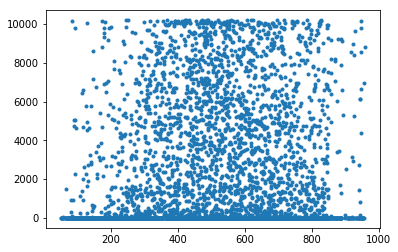

In [85]:
plt.scatter(fdf['z'],fdf['salt per img'],marker='.')
plt.show()

No correlation between depth and salt per img values

### Empty masks

In [101]:
depth_zero = []
for i in range(len(fdf['z'])):
    if (fdf['salt per img'][i] == 0):
        depth_zero.append(fdf['z'][i])
depth_zero = np.asarray(depth_zero)
print(depth_zero.shape)

(1562,)


Number of masks with no salt on them are 1562

In [106]:
print('min_depth :',depth_zero.min())
print('max_depth :',depth_zero.max())

min_depth : 51
max_depth : 956


Plotting empty masks

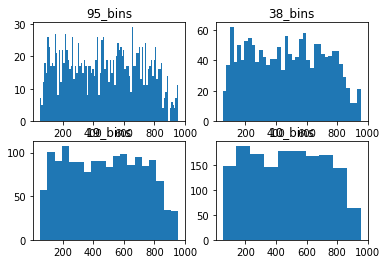

In [114]:
plt.subplot(2, 2, 1)
plt.hist(depth_zero,bins=95)
plt.title('95_bins')

plt.subplot(2, 2, 2)
plt.hist(depth_zero,bins=38)
plt.title('38_bins')

plt.subplot(2, 2, 3)
plt.hist(depth_zero,bins=19)
plt.title('19_bins')

plt.subplot(2, 2, 4)
plt.hist(depth_zero,bins=10)
plt.title('10_bins')

plt.show()

Not much of a pattern, but it looks like that we have more number of empty masks for lower depth then the number of empty masks decrease a little bit and then increase again.

## salt masks

In [115]:
depth_salt = []
for i in range(len(fdf['z'])):
    if (fdf['salt per img'][i] != 0):
        depth_salt.append(fdf['z'][i])
depth_salt = np.asarray(depth_salt)
print(depth_salt.shape)

(2438,)


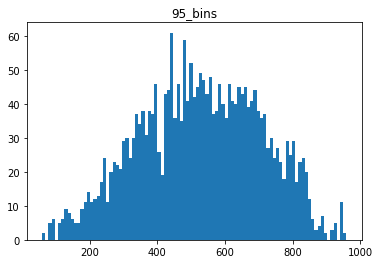

In [117]:
plt.hist(depth_salt,bins=95)
plt.title('95_bins')

plt.show()

Most of the salt containing masks are between 250 and 800m depth

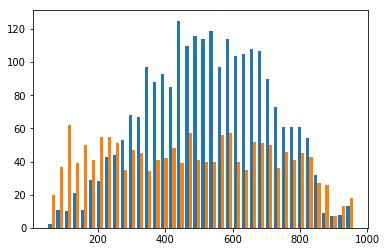

In [124]:
x_multi = [x for x in [depth_salt, depth_zero]]

plt.hist(x_multi,bins=38)
plt.show()


This one tells us something

Maybe we should now compare the number of salt pixels among these, then we can check if the highest values of salt pixels lie between 350 and 800m.